In [15]:
import datetime as dt
import matplotlib.pyplot as plt
# import matplotlib.pyplot.style as style
import pandas as pd
import pandas_datareader.data as web

In [14]:
plt.style.use('ggplot')
start = dt.datetime(2000,1,1)
end = dt.datetime(2016,12,31)

# yahoo is not working for some reason
df = web.DataReader('TSLA', 'google',start, end)
df.to_csv('tsla.csv')
# print(df.tail(6))

In [9]:
print(df.head())

             Open   High    Low  Close    Volume
Date                                            
2010-06-29  19.00  25.00  17.54  23.89  18783276
2010-06-30  25.79  30.42  23.30  23.83  17194394
2010-07-01  25.00  25.92  20.27  21.96   8229863
2010-07-02  23.00  23.10  18.71  19.20   5141807
2010-07-06  20.00  20.00  15.83  16.11   6879296


In [26]:
df = pd.read_csv('tsla.csv', parse_dates=True, index_col=0)

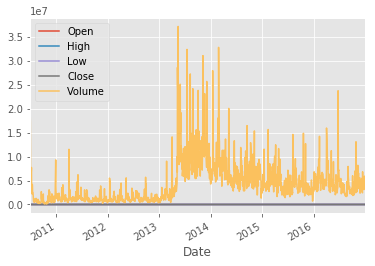

In [18]:
df.plot()
plt.show()

In [27]:
df['100ma'] = df['Close'].rolling(window=100, min_periods=0).mean()
df.head()

,Open,High,Low,Close,Volume,100ma
Date,,,,,,
2010-06-29,19.00,25.00,17.54,23.89,18783276,23.890000
2010-06-30,25.79,30.42,23.30,23.83,17194394,23.860000
2010-07-01,25.00,25.92,20.27,21.96,8229863,23.226667
2010-07-02,23.00,23.10,18.71,19.20,5141807,22.220000
2010-07-06,20.00,20.00,15.83,16.11,6879296,20.998000


In [28]:
df.dropna(inplace=True)
df.head()

,Open,High,Low,Close,Volume,100ma
Date,,,,,,
2010-06-29,19.00,25.00,17.54,23.89,18783276,23.890000
2010-06-30,25.79,30.42,23.30,23.83,17194394,23.860000
2010-07-01,25.00,25.92,20.27,21.96,8229863,23.226667
2010-07-02,23.00,23.10,18.71,19.20,5141807,22.220000
2010-07-06,20.00,20.00,15.83,16.11,6879296,20.998000


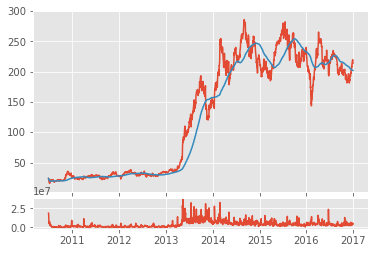

In [31]:
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)
ax1.plot(df.index, df['Close'])
ax1.plot(df.index, df['100ma'])
ax2.plot(df.index, df['Volume'])
plt.show()